In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("waterDataset.csv")  

## Step 1: Handle numeric correlation cleanly

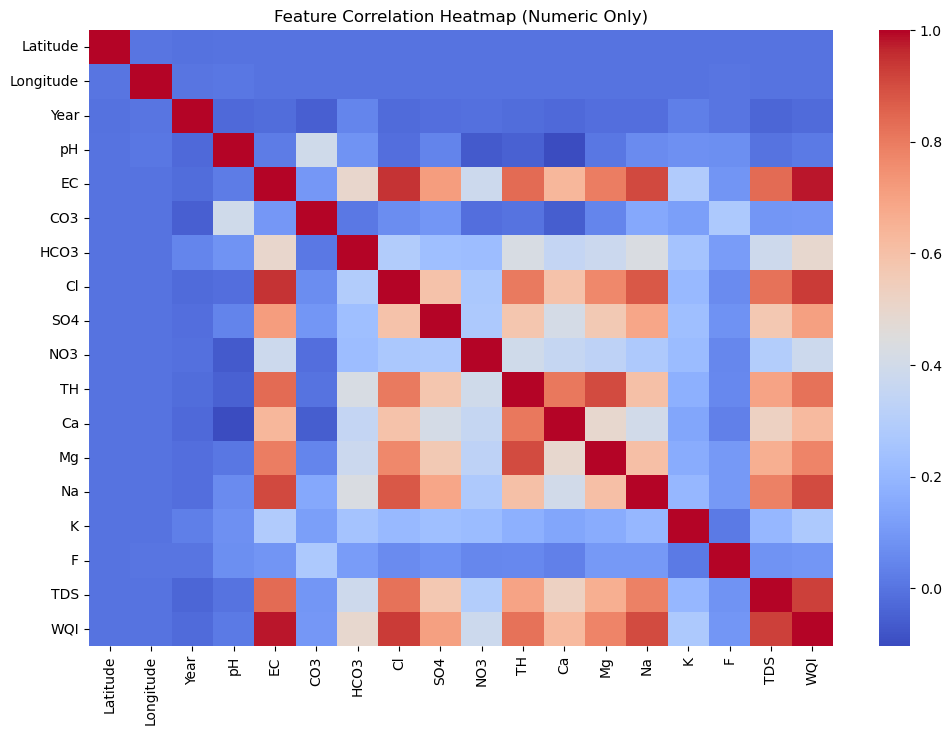

In [3]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numeric Only)")
plt.show()


## Step 2: Categorical feature exploration

In [5]:

categorical_df = df.select_dtypes(include=['object'])

for col in categorical_df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Well_ID: 9805 unique values
State: 14 unique values
District: 600 unique values
Block: 5055 unique values
Village: 11210 unique values
Water Quality Classification: 5 unique values


## Step 3: Check target variable distribution

/var/folders/hk/4xmkxc4s14b937rm1vr0br9c0000gn/T/ipykernel_1551/366650497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Water Quality Classification", palette="Set2")


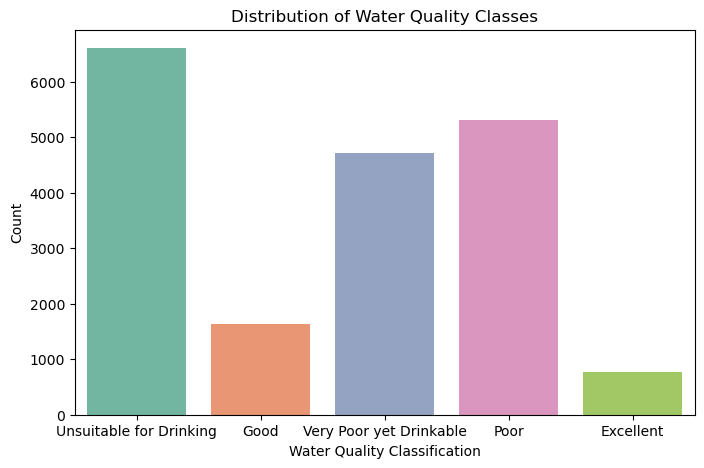

Water Quality Classification
Unsuitable for Drinking    6608
Poor                       5317
Very Poor yet Drinkable    4709
Good                       1632
Excellent                   763
Name: count, dtype: int64


In [7]:
# Step 1: Target distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Water Quality Classification", palette="Set2")
plt.title("Distribution of Water Quality Classes")
plt.xlabel("Water Quality Classification")
plt.ylabel("Count")
plt.show()


print(df["Water Quality Classification"].value_counts())


## Step 4: Explore feature distributions by class

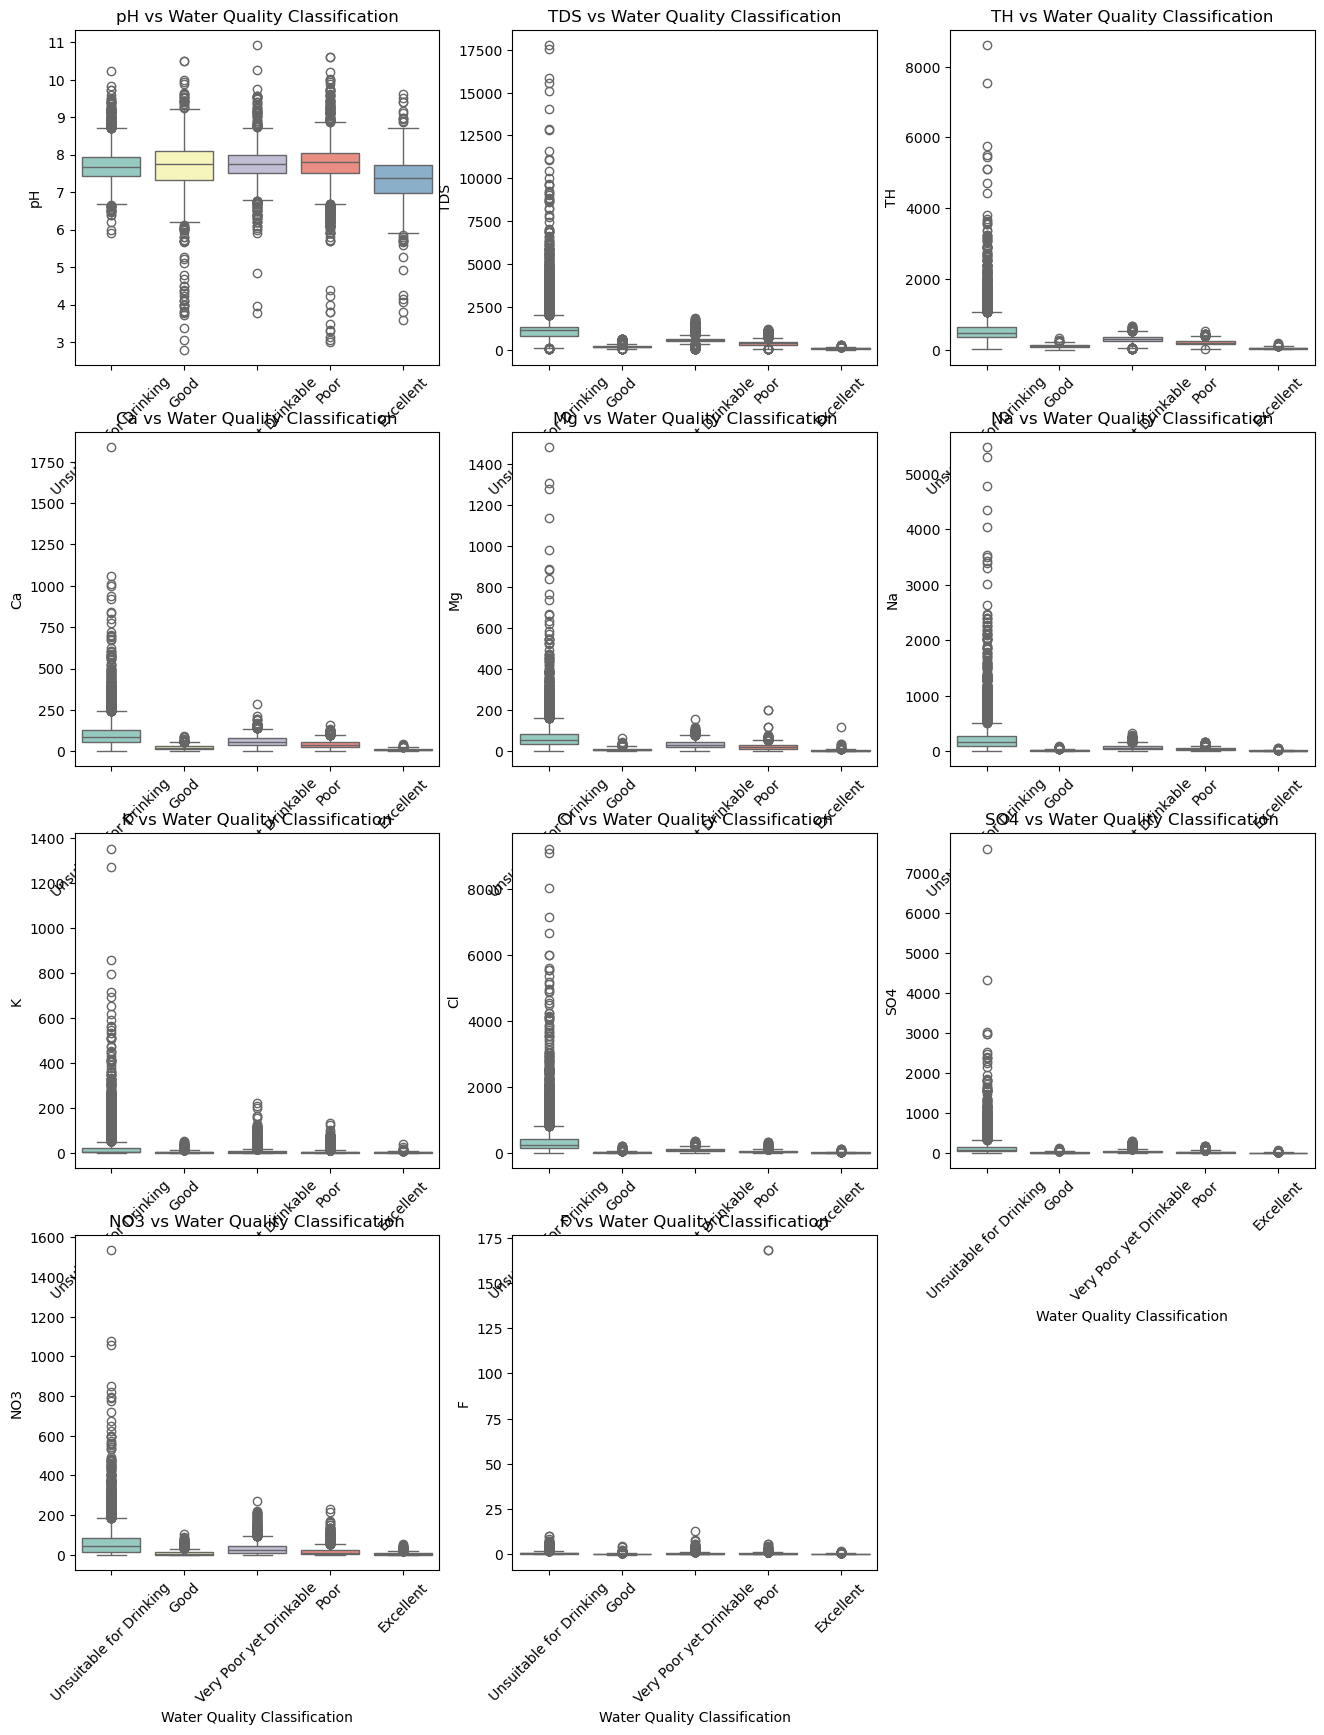

In [9]:
features_to_check = ["pH", "TDS", "TH", "Ca", "Mg", "Na", "K", "Cl", "SO4", "NO3", "F"]

plt.figure(figsize=(16, 20))

for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(
    data=df,
    x="Water Quality Classification",
    y=feature,
    hue="Water Quality Classification",  # add this
    palette="Set3",
    legend=False
)

    plt.title(f"{feature} vs Water Quality Classification")
    plt.xticks(rotation=45)




## Step5 Histograms for each feature

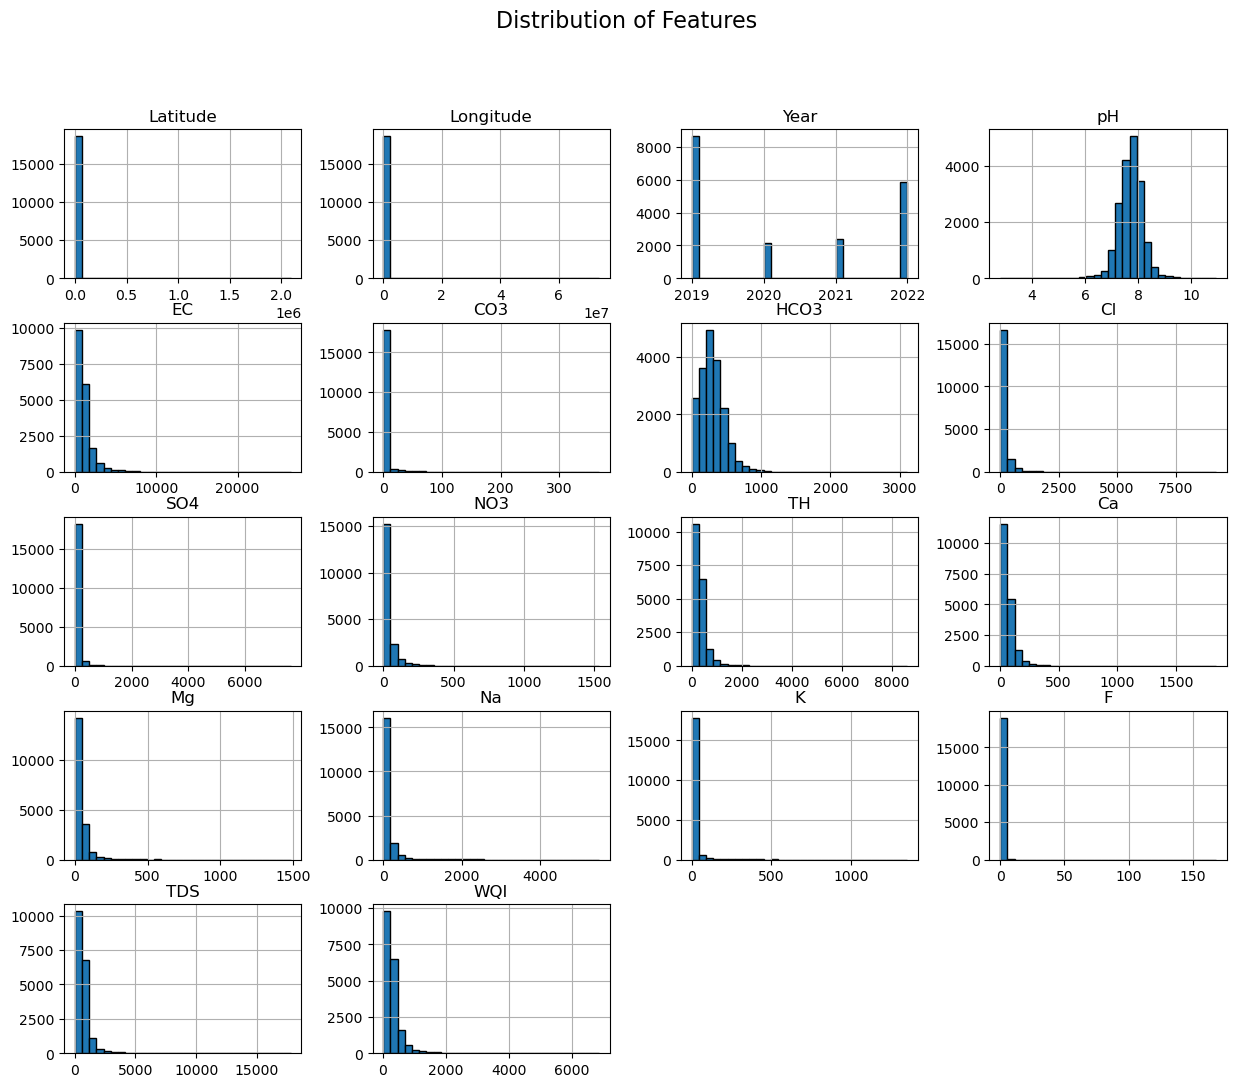

In [11]:
# Block 1: Histograms for each feature
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()


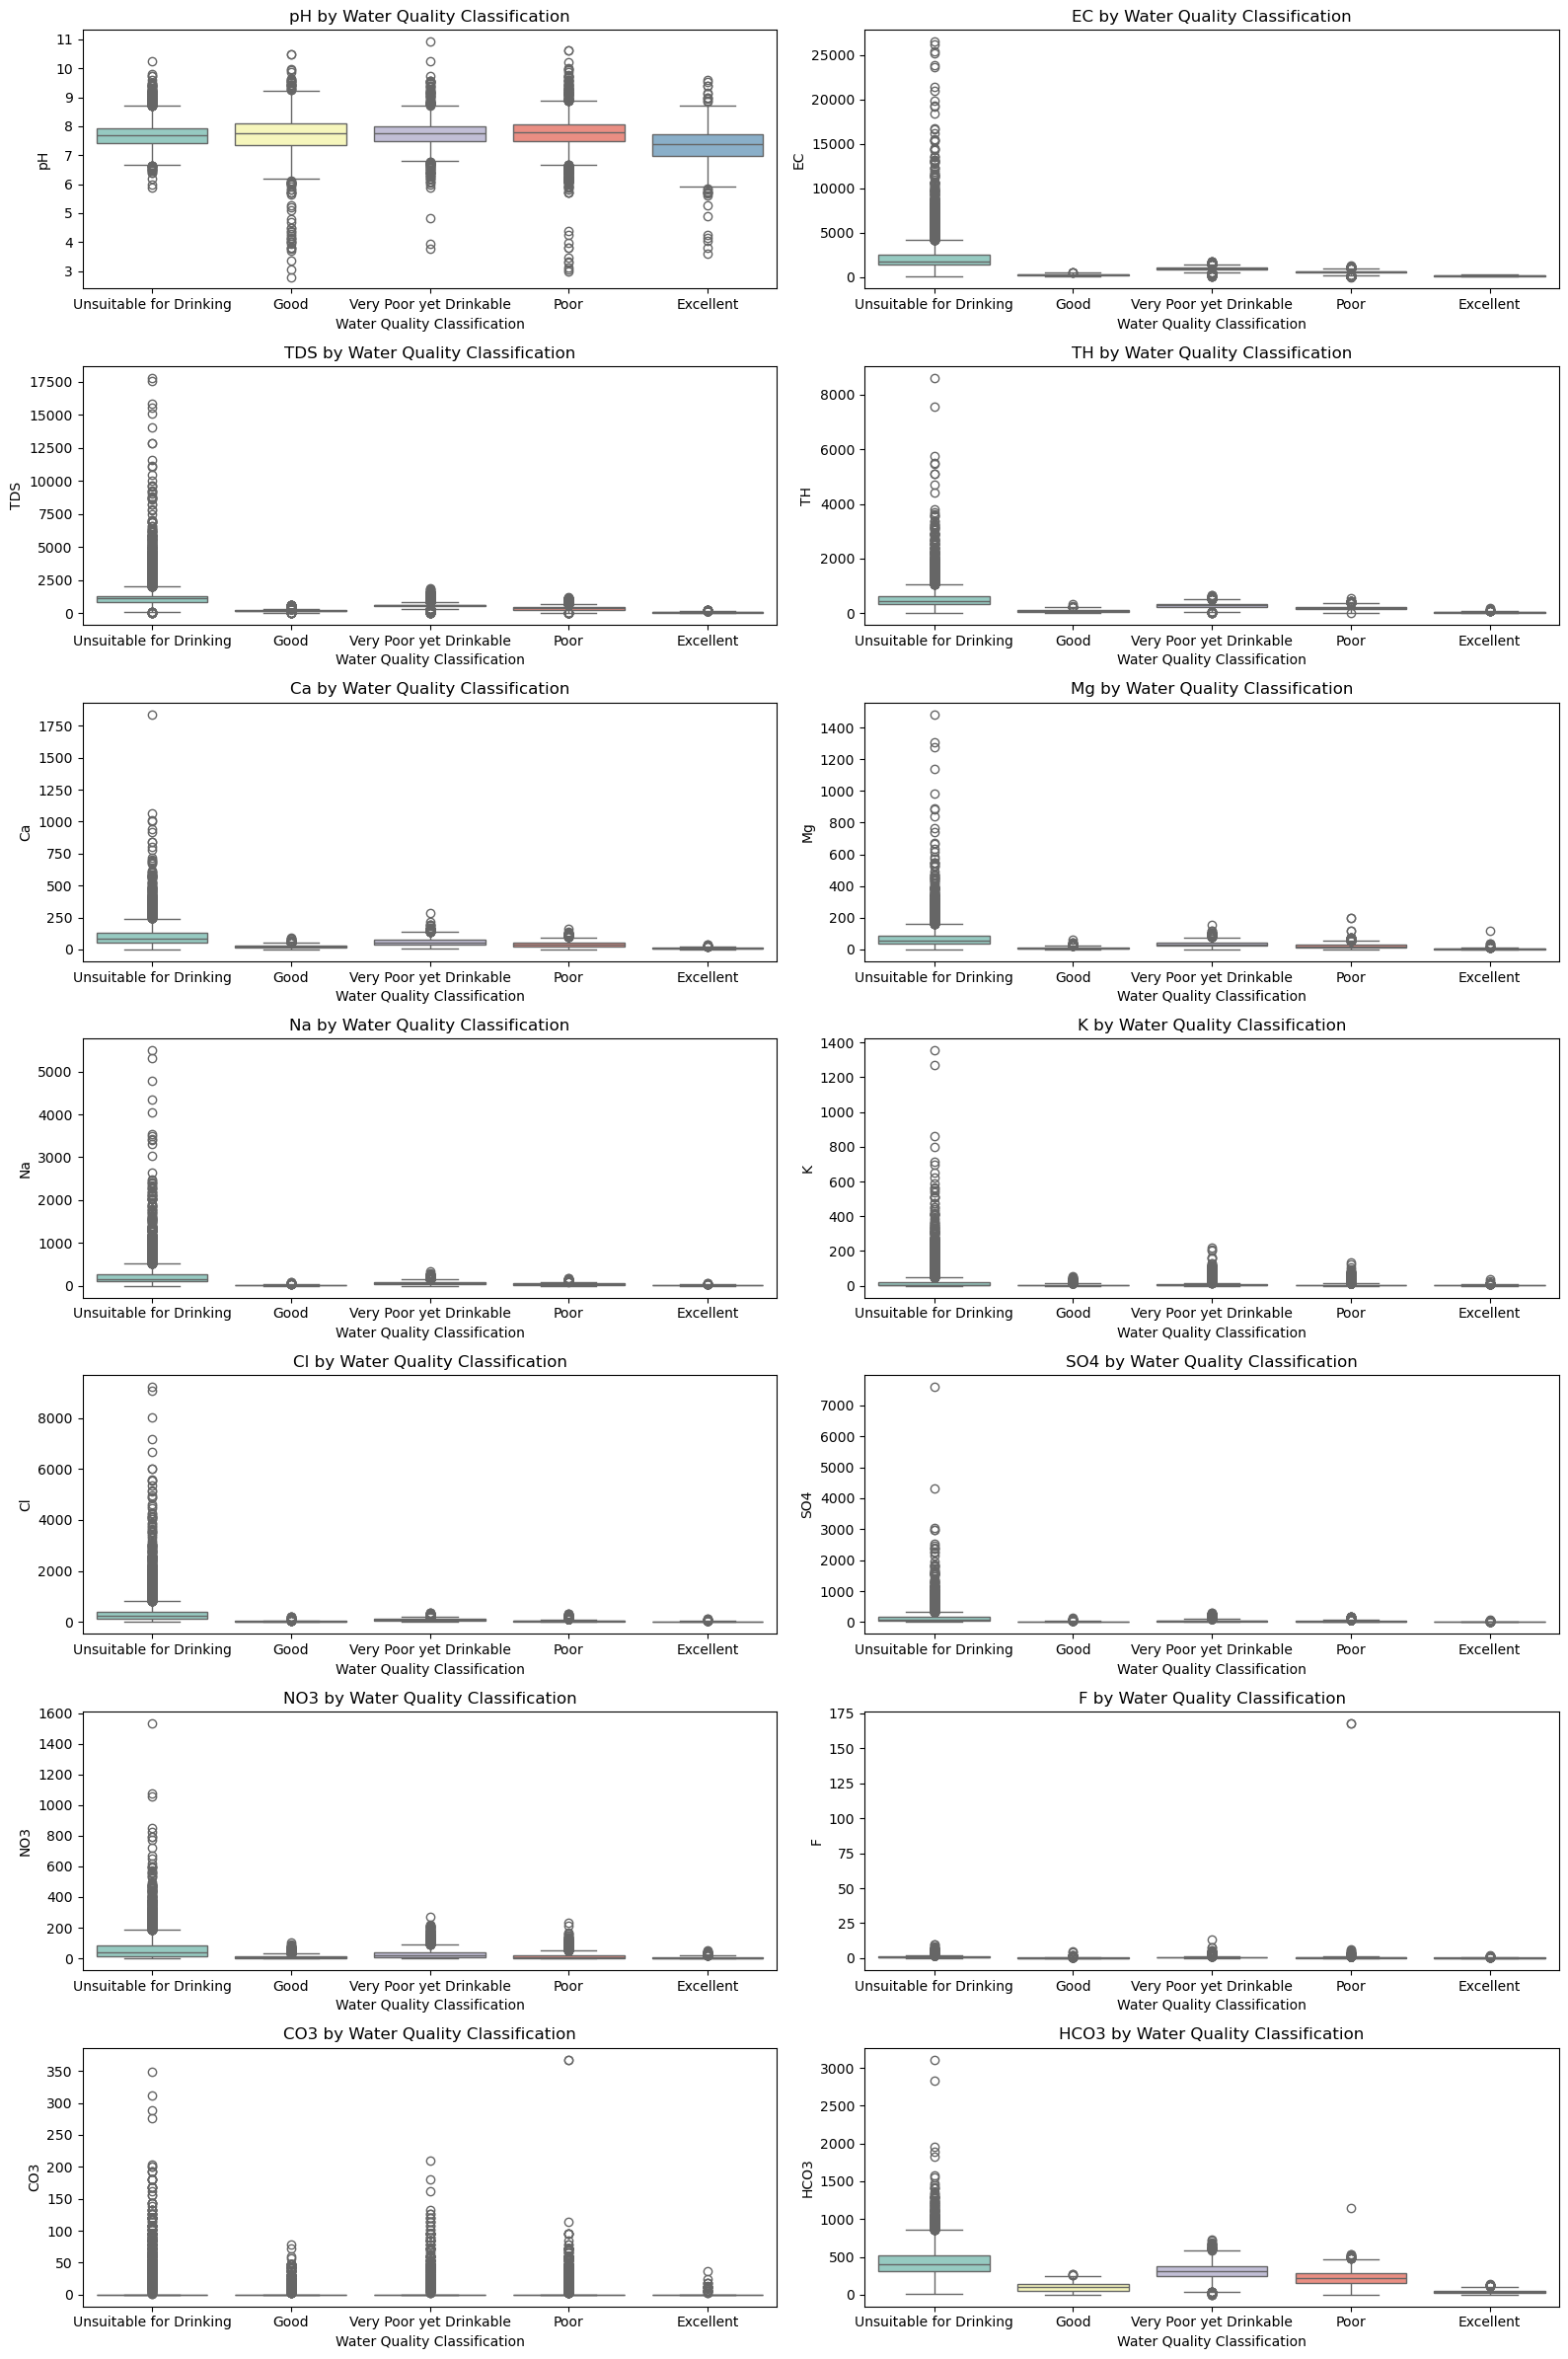

In [19]:
features = ['pH', 'EC', 'TDS', 'TH', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'NO3', 'F', 'CO3', 'HCO3']

plt.figure(figsize=(16, 24))

for i, feature in enumerate(features, 1):
    plt.subplot(7, 2, i)  # 7 rows, 2 columns
    sns.boxplot(data=df, x="Water Quality Classification", y=feature, hue="Water Quality Classification", legend=False, palette="Set3")
    plt.title(f"{feature} by Water Quality Classification")

plt.tight_layout()
plt.show()